# Install MySql
    1. sudo apt update
    2. sudo apt upgrade
    3. sudo apt install mysql-server
    4. mysql --version
    
    Password
    1. sudo mysql -u root
    2. USE mysql;
    3. ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'yourpass';
    

# Install Mysql.connector (Python Library)
    python -m pip install mysql-connector-python

# Import Library

In [1]:
import mysql.connector

# creating a connection

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="pass"
)

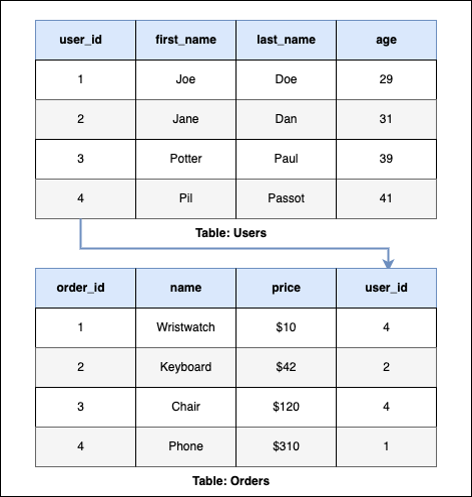

# Create new Dataset

In [3]:
mycursor = mydb.cursor()
sql = "CREATE DATABASE Shop"
mycursor.execute(sql)

# Show all Datasets

In [3]:
mycursor = mydb.cursor()
sql1 = "SHOW DATABASES"
mycursor.execute(sql1)
for x in mycursor:
    print(x)

('Shop',)
('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('phonebook',)
('sys',)


# Remove a Dataset

In [5]:
sql = "DROP DATABASE phonebook"
mycursor.execute(sql)

In [6]:
sql1 = "SHOW DATABASES"
mycursor.execute(sql1)
for x in mycursor:
    print(x)

('Shop',)
('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('sys',)


# Connecting to "Shop"

In [3]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "pass",
    database= "Shop"
)
mycursor = mydb.cursor()

# Creating tables

In [4]:
mycursor = mydb.cursor()
sql = """
        CREATE TABLE Users(
        user_id int NOT NULL,
        first_name varchar(255) NOT NULL,
        last_name varchar(255),
        age int,
        PRIMARY KEY (user_id)
        );
"""
mycursor.execute(sql)

In [5]:
mycursor = mydb.cursor()
sql = """
        CREATE TABLE Orders(
        order_id int NOT NULL,
        user_id int,
        name varchar(255) NOT NULL,
        price int,
        PRIMARY KEY (order_id),
        FOREIGN KEY (user_id) REFERENCES Users(user_id)
        );
"""
mycursor.execute(sql)

# Show Tables

In [6]:
sql = "SHOW TABLES"
mycursor.execute(sql)
for i in mycursor:
    print(i)

('Orders',)
('Users',)


# Insert data

In [7]:
mycursor = mydb.cursor()
sql = """INSERT INTO Users VALUES (1, 'Diana', 'Karimi', 34),
                                 (2, 'Sara', 'Bakhshandeh', 24),
                                 (3, 'Ali', 'Salehi', 22),
                                 (4, 'Maryam', 'Naseri', 20)"""
#mycursor.execute(sql)

In [8]:
mydb.commit()

In [22]:
sql = """INSERT INTO Orders VALUES (1, 1, 'laptop', 300),
                                   (2, 2, 'phone', 100),
                                   (3, 1, 'camera', 200),
                                   (4, 1, 'phone', 300)
    """
mycursor.execute(sql)
mydb.commit()

# Select

In [23]:
sql = "SELECT * FROM Orders"
#sql = "SELECT name, price FROM Orders WHERE name LIKE '%h%'"
mycursor.execute(sql)
result = mycursor.fetchall()
result

[(1, 1, 'laptop', 300),
 (2, 2, 'laptop', 300),
 (3, 1, 'camera', 200),
 (4, 4, 'camera', 200)]

# Remove data

In [17]:
mycursor = mydb.cursor()
sql = "DELETE FROM Orders WHERE order_id >= 1"
mycursor.execute(sql)
mydb.commit()

In [12]:
sql = "SELECT * FROM Orders"
mycursor.execute(sql)
result = mycursor.fetchall()
result

[(2, 2, 'laptop', 300),
 (4, 4, 'camera', 200),
 (5, 1, 'laptop', 300),
 (7, 1, 'camera', 200)]

# Update data

In [13]:
sql = "UPDATE Users SET first_name = 'ali' WHERE last_name = 'Salehi'"
mycursor.execute(sql)

In [14]:
sql = "SELECT * FROM Users"
mycursor.execute(sql)
result = mycursor.fetchall()
result

[(1, 'Diana', 'Karimi', 34),
 (2, 'Sara', 'Bakhshandeh', 24),
 (3, 'ali', 'Salehi', 22),
 (4, 'Maryam', 'Naseri', 20)]

# Join

In [15]:
sql = """
        SELECT * FROM Orders, Users
        WHERE Orders.user_id = Users.user_id
"""


In [16]:
mycursor.execute(sql)
index = mycursor.fetchall()
index

[(2, 2, 'laptop', 300, 2, 'Sara', 'Bakhshandeh', 24),
 (4, 4, 'camera', 200, 4, 'Maryam', 'Naseri', 20),
 (5, 1, 'laptop', 300, 1, 'Diana', 'Karimi', 34),
 (7, 1, 'camera', 200, 1, 'Diana', 'Karimi', 34)]